In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [4]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

wine_lr = LogisticRegression(solver='liblinear', random_state=14)
wine_lr.fit(x_train, y_train)
y_pred_tr = wine_lr.predict(x_train)
y_pred_test = wine_lr.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.7400423321146815
Test Acc     :  0.7423076923076923


In [5]:
estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=14))]
pipe = Pipeline(estimators)
pipe.fit(x_train, y_train)
y_pred_tr = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.741581681739465
Test Acc     :  0.7438461538461538


In [12]:
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=5)
wine_tree.fit(x_train, y_train)
models = {'logistic regression':pipe, 'decision tree':wine_tree}

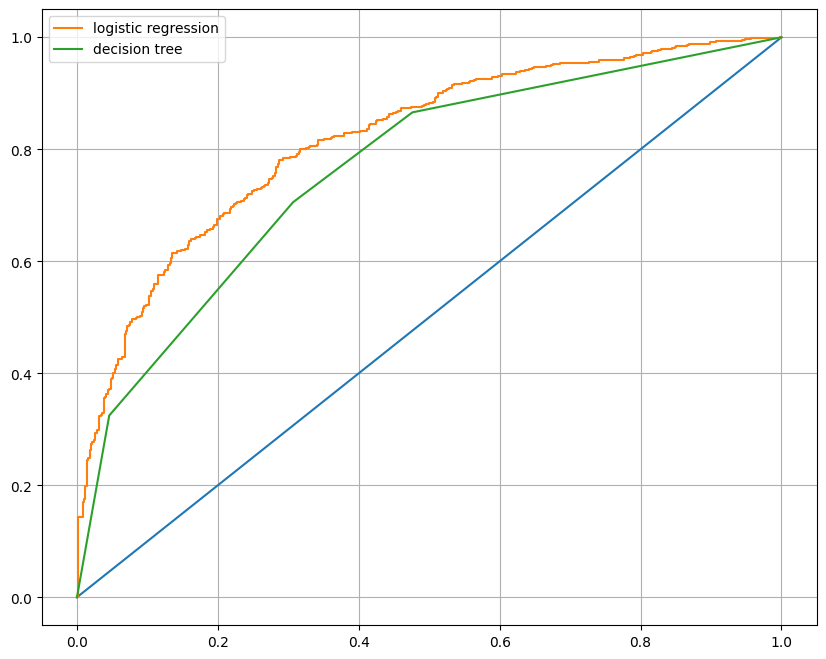

In [13]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
for model_name, model in models.items() :
    pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

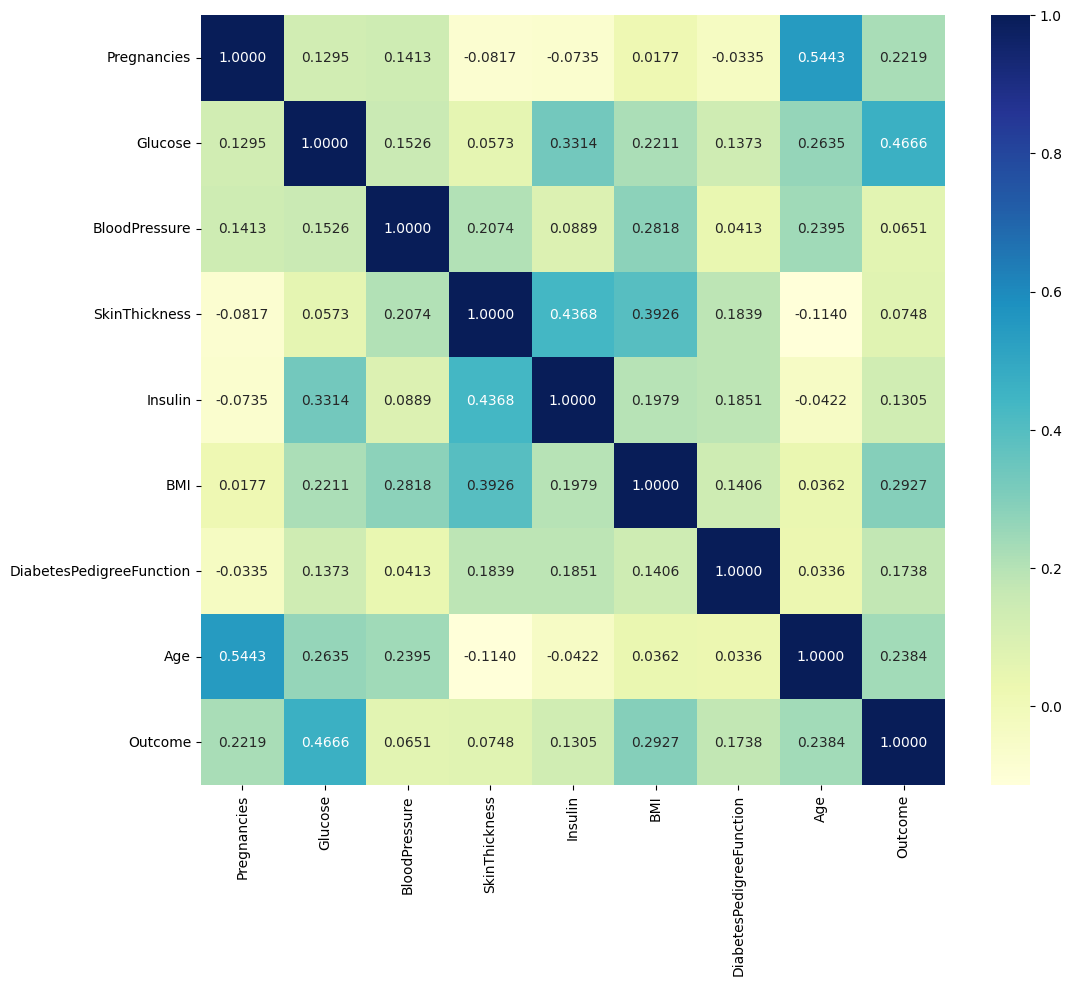

In [17]:
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA = PIMA.astype('float')
plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), annot=True, fmt='.4f', cmap="YlGnBu")
plt.show()

In [4]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:

x = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=14))]
pipe = Pipeline(estimators)
pipe.fit(x_train, y_train)
y_pred_tr = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

print('Accuarcy     : ', accuracy_score(y_test, y_pred_test))
print('Recall       : ', recall_score(y_test, y_pred_test))
print('Precision    : ', precision_score(y_test, y_pred_test))
print('AUC score    : ', roc_auc_score(y_test, y_pred_test))
print('F1 score     : ', f1_score(y_test, y_pred_test))

Accuarcy     :  0.8376623376623377
Recall       :  0.7037037037037037
Precision    :  0.8085106382978723
AUC score    :  0.8068518518518518
F1 score     :  0.7524752475247525


In [11]:
coeff = list(pipe['clf'].coef_[0])
labels = list(x_train.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

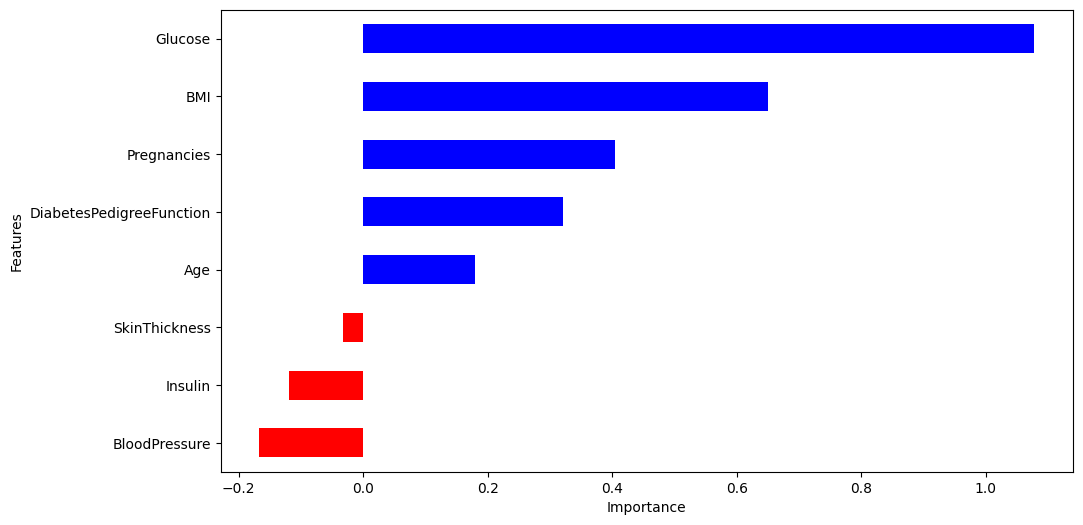

In [12]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features['importance'].plot(kind='barh', figsize=(11,6), color=features['positive'].map({True:'blue', False:'red'}))
plt.xlabel('Importance')
plt.show()